In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


(-0.5, 27.5, 27.5, -0.5)

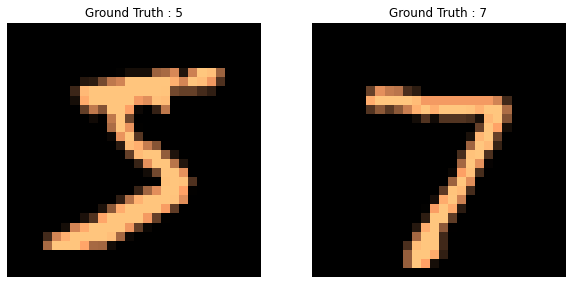

In [5]:

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))
plt.axis("off")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))
plt.axis("off")

#### 2. Preprocessing

In [6]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

In [7]:
train_x.shape

(60000, 784)

#### 3. Model Configuration

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y_one_hot,
                   batch_size=256, epochs=10, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")



Epoch 1/10
235/235 [==============================] - 5s 18ms/step - loss: 0.2723 - accuracy: 0.9160 - val_loss: 0.1181 - val_accuracy: 0.9634
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0949 - accuracy: 0.9706 - val_loss: 0.1159 - val_accuracy: 0.9620
Epoch 3/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.1020 - val_accuracy: 0.9679
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0395 - accuracy: 0.9872 - val_loss: 0.0701 - val_accuracy: 0.9799
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0763 - val_accuracy: 0.9786
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0661 - val_accuracy: 0.9835
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0946 - val_accuracy: 0.9752